# Measures To Evaluate Performance of Softwares

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import numpy as np

Using Steel Plates Faults Data Set as a csv file

In [14]:
df = pd.read_csv('SteelPlateFaults-2class.csv')
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
0,1325,1339,30207,30238,268,29,31,25809,79,124,...,0.4828,1.0000,1.0,2.4281,1.1461,1.4914,0.5484,-0.2476,0.7065,1
1,1,16,55572,55629,370,48,62,39293,27,119,...,0.3125,0.9194,1.0,2.5682,1.1761,1.7559,0.7368,-0.1703,0.9755,1
2,1323,1333,68445,68506,330,48,61,33449,90,119,...,0.2083,1.0000,1.0,2.5185,1.0000,1.7853,0.8361,-0.2081,0.8861,1
3,1324,1333,75642,75681,207,25,39,21354,93,124,...,0.3600,1.0000,1.0,2.3160,0.9542,1.5911,0.7692,-0.1941,0.5805,1
4,1324,1335,97132,97213,594,55,81,61608,93,125,...,0.2000,1.0000,1.0,2.7738,1.0414,1.9085,0.8642,-0.1897,0.9806,1


Splitting the data of each class from SteelPlateFaults-2class.csv into train data and test data

In [15]:
#In class '0'
df_0 = df[df["Class"]==0]

[X_train_0, X_test_0,X_label_train_0,X_label_test_0] = train_test_split(df_0,
                                   df_0['Class'], test_size=0.3,
                                   random_state=42, shuffle=True)

#In class '1'
df_1 = df[df["Class"]==1]

[X_train_1, X_test_1,
  X_label_train_1,
  X_label_test_1] = train_test_split(df_1,
                                   df_1['Class'], test_size=0.3,
                                   random_state=42, shuffle=True)                            
## Joining the training of class 0 and 1
# and testing data of class 0 and 1
[X_train, X_test, X_label_train,
 X_label_test] = [X_train_0.append(X_train_1),
                  X_test_0.append(X_test_1),
                  X_label_train_0.append(X_label_train_1),
                  X_label_test_0.append(X_label_test_1)]

Normalizing all the attributes (except class attribute) of SteelPlateFaults-train.csv using Min-Max normalization to transform the data in the range [0-1]

Normalizing X_train :-

In [16]:
min_max_scaler = MinMaxScaler()
X_train_normalised = min_max_scaler.fit_transform(X_train)
X_train_normalised = pd.DataFrame(X_train_normalised)
X_train_normalised.rename(columns={i: list(df)[i] for i in range(len(list(df)))}, inplace=True)
print(X_train_normalised.head())

   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0.542522   0.543911   0.047166   0.047166      0.000478     0.000670   
1   0.052199   0.085480   0.222930   0.222935      0.012492     0.016560   
2   0.024047   0.124707   0.245024   0.245028      0.042587     0.025079   
3   0.024047   0.110070   0.167649   0.167659      0.070362     0.062219   
4   0.024047   0.120609   0.175973   0.175977      0.042561     0.024983   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0     0.000551           0.001065               0.765306   
1     0.006832           0.021121               0.612245   
2     0.007383           0.058436               0.204082   
3     0.022974           0.106950               0.193878   
4     0.007493           0.058347               0.219388   

   Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index  \
0               0.662037  ...       1.000000       1.000000   
1               0.476852  ...       0.344866       0.537

Normalizing X_test :-

In [17]:
# Dropping the tuples having out of bound values
# (As compared with the min. and max. from training data)
drop_tuple_indexes = set()
for i in range(len(list(df))):
    for j in X_test.index:
        if(X_test[list(X_test)[i]][j] < min_max_scaler.data_min_[i]):
            drop_tuple_indexes.add(j)
        if(X_test[list(X_test)[i]][j] > min_max_scaler.data_max_[i]):
            drop_tuple_indexes.add(j)

X_test_normalised = min_max_scaler.fit_transform(X_test.drop(list(drop_tuple_indexes), axis=0))
X_test_normalised = pd.DataFrame(X_test_normalised)
X_test_normalised.rename(columns={i: list(df)[i] for i in range(len(list(df)))}, inplace=True)
print(X_test_normalised.head())

   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0.435196   0.440668   0.015306   0.015306      0.004401     0.010601   
1   0.959572   0.970185   0.062702   0.062705      0.024795     0.023852   
2   0.489893   0.489565   0.086577   0.086577      0.001140     0.002650   
3   0.023187   0.119857   0.211414   0.211420      0.267319     0.238516   
4   0.040428   0.116279   0.734280   0.734284      0.171795     0.152827   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0     0.012968           0.007982               1.000000   
1     0.047550           0.015214               0.281250   
2     0.008646           0.002049               0.822917   
3     0.200288           0.231757               0.208333   
4     0.141210           0.154306               0.354167   

   Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index  \
0               0.788732  ...       1.000000       1.000000   
1               0.253521  ...       0.704166       0.966

# KNN Classifier
Using the KNN Classifier to classify given dataset

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_normalised[list(df)[:-1]],X_train_normalised['Class'])

KNeighborsClassifier(n_neighbors=3)

In [19]:
print("Accuracy : %.2f"%(knn.score(X_test_normalised[list(df)[:-1]],X_test_normalised['Class'])))

Accuracy : 0.98


In [20]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

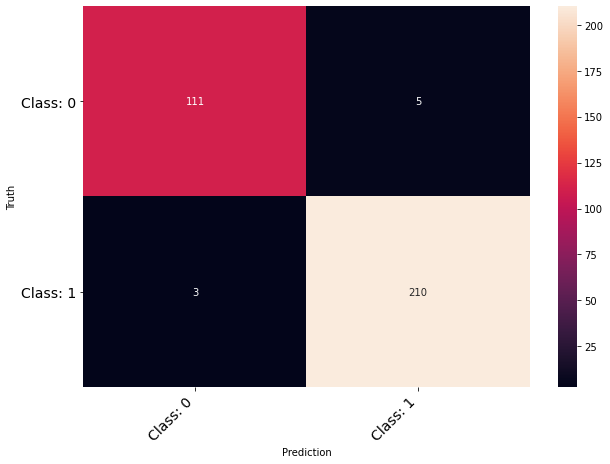

In [21]:
cm = confusion_matrix(X_test_normalised['Class'],knn.predict(X_test_normalised[list(df)[:-1]]))
print_confusion_matrix(cm,["Class: 0","Class: 1"])

In [23]:
report = classification_report(X_test_normalised['Class'],knn.predict(X_test_normalised[list(df)[:-1]]))
print(classification_report(X_test_normalised['Class'],knn.predict(X_test_normalised[list(df)[:-1]])))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       116
         1.0       0.98      0.99      0.98       213

    accuracy                           0.98       329
   macro avg       0.98      0.97      0.97       329
weighted avg       0.98      0.98      0.98       329



Verifying it manually for class 0:-

In [33]:
#Precision = TP/TP+FP
Precision = 111/(111+3)
print(Precision)

0.9736842105263158


In [34]:
#Recall = TP/TP + FN
Recall = 111/(111+5)
print(Recall)

0.9568965517241379


In [42]:
#f1-score = 2*Precision *Recall/Precision+Recall
f1_score = 2*0.97*0.96/(0.97+0.96)
print(f1_score)

0.9649740932642487
